#Info

- PatientID: A unique identifier assigned to each patient (5034 to 7425).

- Age: The age of the patients ranges from 5 to 80 years.
- Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
- Ethnicity: The ethnicity of the patients, coded as follows:
 - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other
- EducationLevel: The education level of the patients, coded as follows:
  - 0: None
  - 1: High School
  - 2: Bachelor's
  - 3: Higher
- BMI: Body Mass Index of the patients, ranging from 15 to 40.
- Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
- PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
- DietQuality: Diet quality score, ranging from 0 to 10.
- SleepQuality: Sleep quality score, ranging from 4 to 10.
- PollutionExposure: Exposure to pollution, score from 0 to 10.
- PollenExposure: Exposure to pollen, score from 0 to 10.
- DustExposure: Exposure to dust, score from 0 to 10.
- PetAllergy: Pet allergy status, where 0 indicates No and 1 indicates Yes.
- FamilyHistoryAsthma: Family history of asthma, where 0 indicates No and 1 indicates Yes.
- HistoryOfAllergies: History of allergies, where 0 indicates No and 1 indicates Yes.
- Eczema: Presence of eczema, where 0 indicates No and 1 indicates Yes.
- HayFever: Presence of hay fever, where 0 indicates No and 1 indicates Yes.
- GastroesophagealReflux: Presence of gastroesophageal reflux, where 0 indicates No and 1 indicates Yes.
- LungFunctionFEV1: Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.
- LungFunctionFVC: Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.
- Wheezing: Presence of wheezing, where 0 indicates No and 1 indicates Yes.
- ShortnessOfBreath: Presence of shortness of breath, where 0 indicates No and 1 indicates Yes.
- ChestTightness: Presence of chest tightness, where 0 indicates No and 1 indicates Yes.
- Coughing: Presence of coughing, where 0 indicates No and 1 indicates Yes.
- NighttimeSymptoms: Presence of nighttime symptoms, where 0 indicates No and 1 indicates Yes.
- ExerciseInduced: Presence of symptoms induced by exercise, where 0 indicates No and 1 indicates Yes.


- Diagnosis: Diagnosis status for Asthma, where 0 indicates No and 1 indicates Yes.


- DoctorInCharge: This column contains confidential information about the doctor in charge, with "Dr_Confid" as the value for all patients.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm

In [ ]:
df = pd.read_csv(r'/content/asthma_disease_data.csv')

# Show column names
names = df.columns.tolist()
[print(index, name) for index,name in enumerate(names,1)]

# Show the shape of the DataFrame (rows, columns)
print("DataFrame shape:", df.shape)

1 PatientID
2 Age
3 Gender
4 Ethnicity
5 EducationLevel
6 BMI
7 Smoking
8 PhysicalActivity
9 DietQuality
10 SleepQuality
11 PollutionExposure
12 PollenExposure
13 DustExposure
14 PetAllergy
15 FamilyHistoryAsthma
16 HistoryOfAllergies
17 Eczema
18 HayFever
19 GastroesophagealReflux
20 LungFunctionFEV1
21 LungFunctionFVC
22 Wheezing
23 ShortnessOfBreath
24 ChestTightness
25 Coughing
26 NighttimeSymptoms
27 ExerciseInduced
28 Diagnosis
29 DoctorInCharge
DataFrame shape: (2392, 29)


In [ ]:
df1=df.drop(['PatientID','DoctorInCharge','Gender','Ethnicity','EducationLevel','Smoking','PetAllergy','FamilyHistoryAsthma','HistoryOfAllergies','Eczema','HayFever','GastroesophagealReflux','Wheezing','ShortnessOfBreath','ChestTightness','Coughing','NighttimeSymptoms','ExerciseInduced','Diagnosis'],axis=1)
df1.head()
#Mantener variables double para realizar análisis de correlación y verificar si debemos conservar todas o hay alguna que podamos omitir

,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,LungFunctionFVC
0,63,15.848744,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1.369051,4.941206
1,26,22.757042,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,2.197767,1.702393
2,57,18.395396,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,1.698011,5.022553
3,40,38.515278,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,3.032037,2.300159
4,61,19.283802,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,3.470589,3.067944


<function matplotlib.pyplot.show(close=None, block=None)>

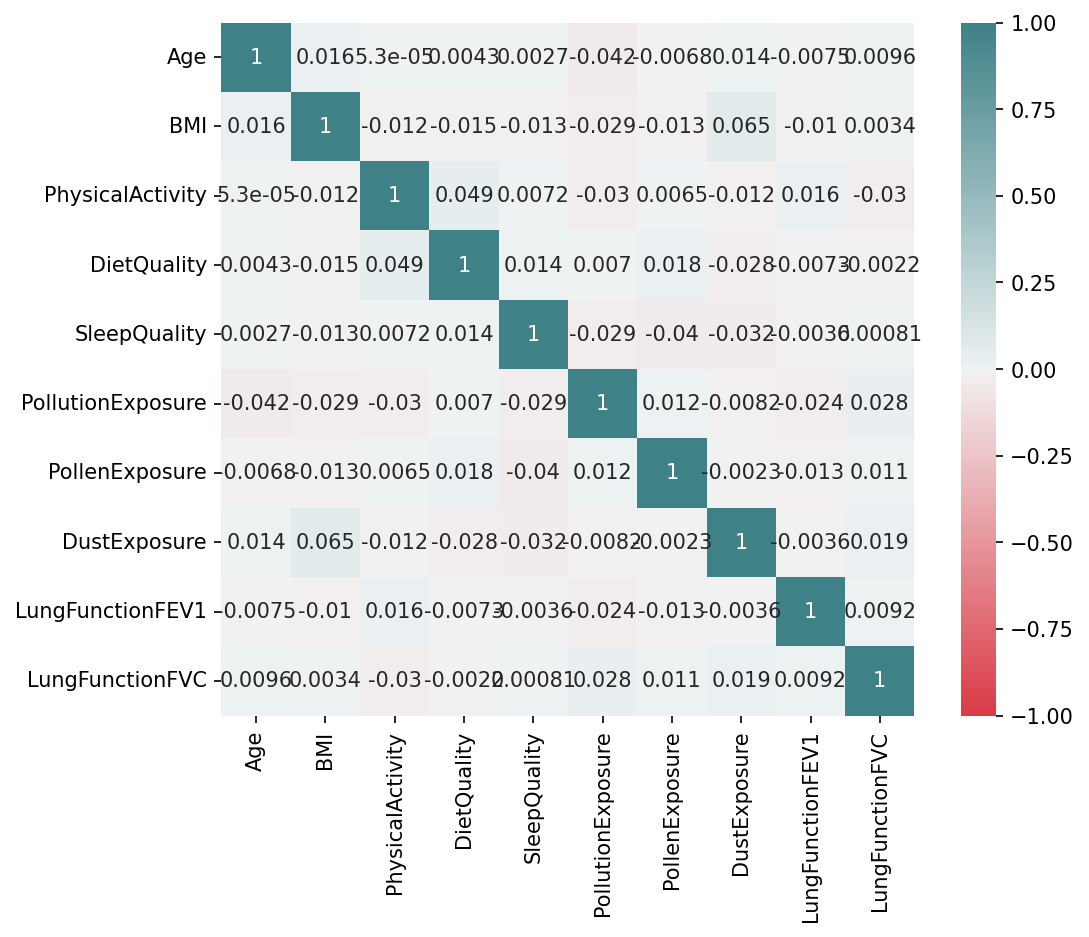

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 6), dpi = 150)
paleta = sns.diverging_palette (200, 10,as_cmap=True). reversed ( )
sns. heatmap(df1.corr(), vmin=-1, vmax=1, cmap=paleta,square=True,annot=True,ax=ax)
plt.show

In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


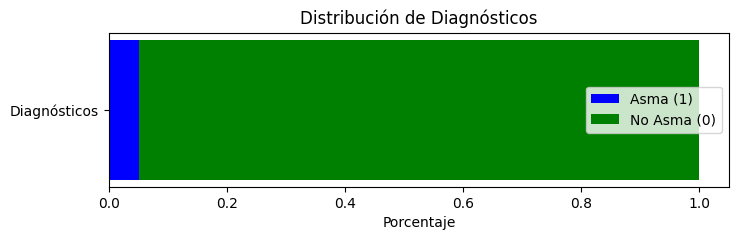

In [ ]:
diagnosis_counts = df["Diagnosis"].value_counts()
total = len(df)
percentages = diagnosis_counts / total

fig, ax = plt.subplots(figsize=(8, 2))
ax.barh(["Diagnósticos"], percentages[1], color="blue", label="Asma (1)")
ax.barh(["Diagnósticos"], percentages[0], left=percentages[1], color="green", label="No Asma (0)")

ax.set_title("Distribución de Diagnósticos")
ax.set_xlabel("Porcentaje")
ax.legend(loc="center right")


plt.show()

In [ ]:
data_cols = ['Age',
 'Gender',
 'Ethnicity',
 'EducationLevel',
 'BMI',
 'Smoking',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'PollutionExposure',
 'PollenExposure',
 'DustExposure',
 'PetAllergy',
 'FamilyHistoryAsthma',
 'HistoryOfAllergies',
 'Wheezing',
 'ShortnessOfBreath',
 'ChestTightness',
 'Coughing',
 'NighttimeSymptoms',
 'ExerciseInduced',
 'Diagnosis']
data = df[data_cols].copy()
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,1,1,0,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,0,1,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1,1,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,0,0,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,0,0,1,1,1,0,0,1,0


In [ ]:
# Check for NA's in all columns
na_counts = data.isna().sum()
print("NA counts for each column:\n", na_counts)

NA counts for each column:
 Age                    0
Gender                 0
Ethnicity              0
EducationLevel         0
BMI                    0
Smoking                0
PhysicalActivity       0
DietQuality            0
SleepQuality           0
PollutionExposure      0
PollenExposure         0
DustExposure           0
PetAllergy             0
FamilyHistoryAsthma    0
HistoryOfAllergies     0
Wheezing               0
ShortnessOfBreath      0
ChestTightness         0
Coughing               0
NighttimeSymptoms      0
ExerciseInduced        0
Diagnosis              0
dtype: int64


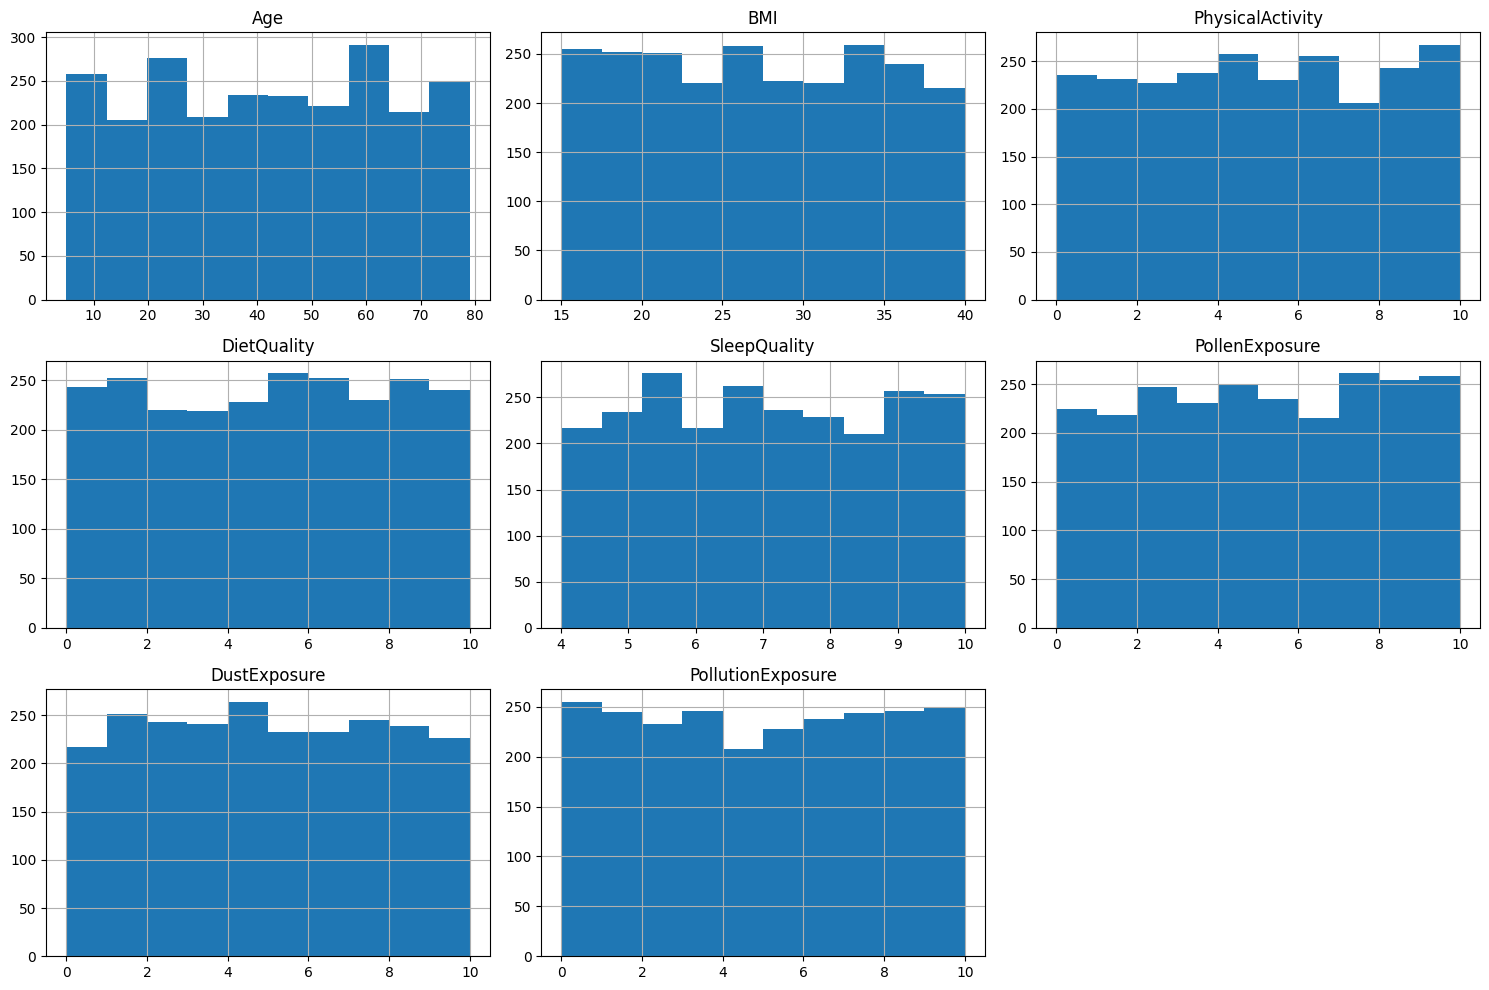

<ipython-input-11-c24f9825bf40>:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


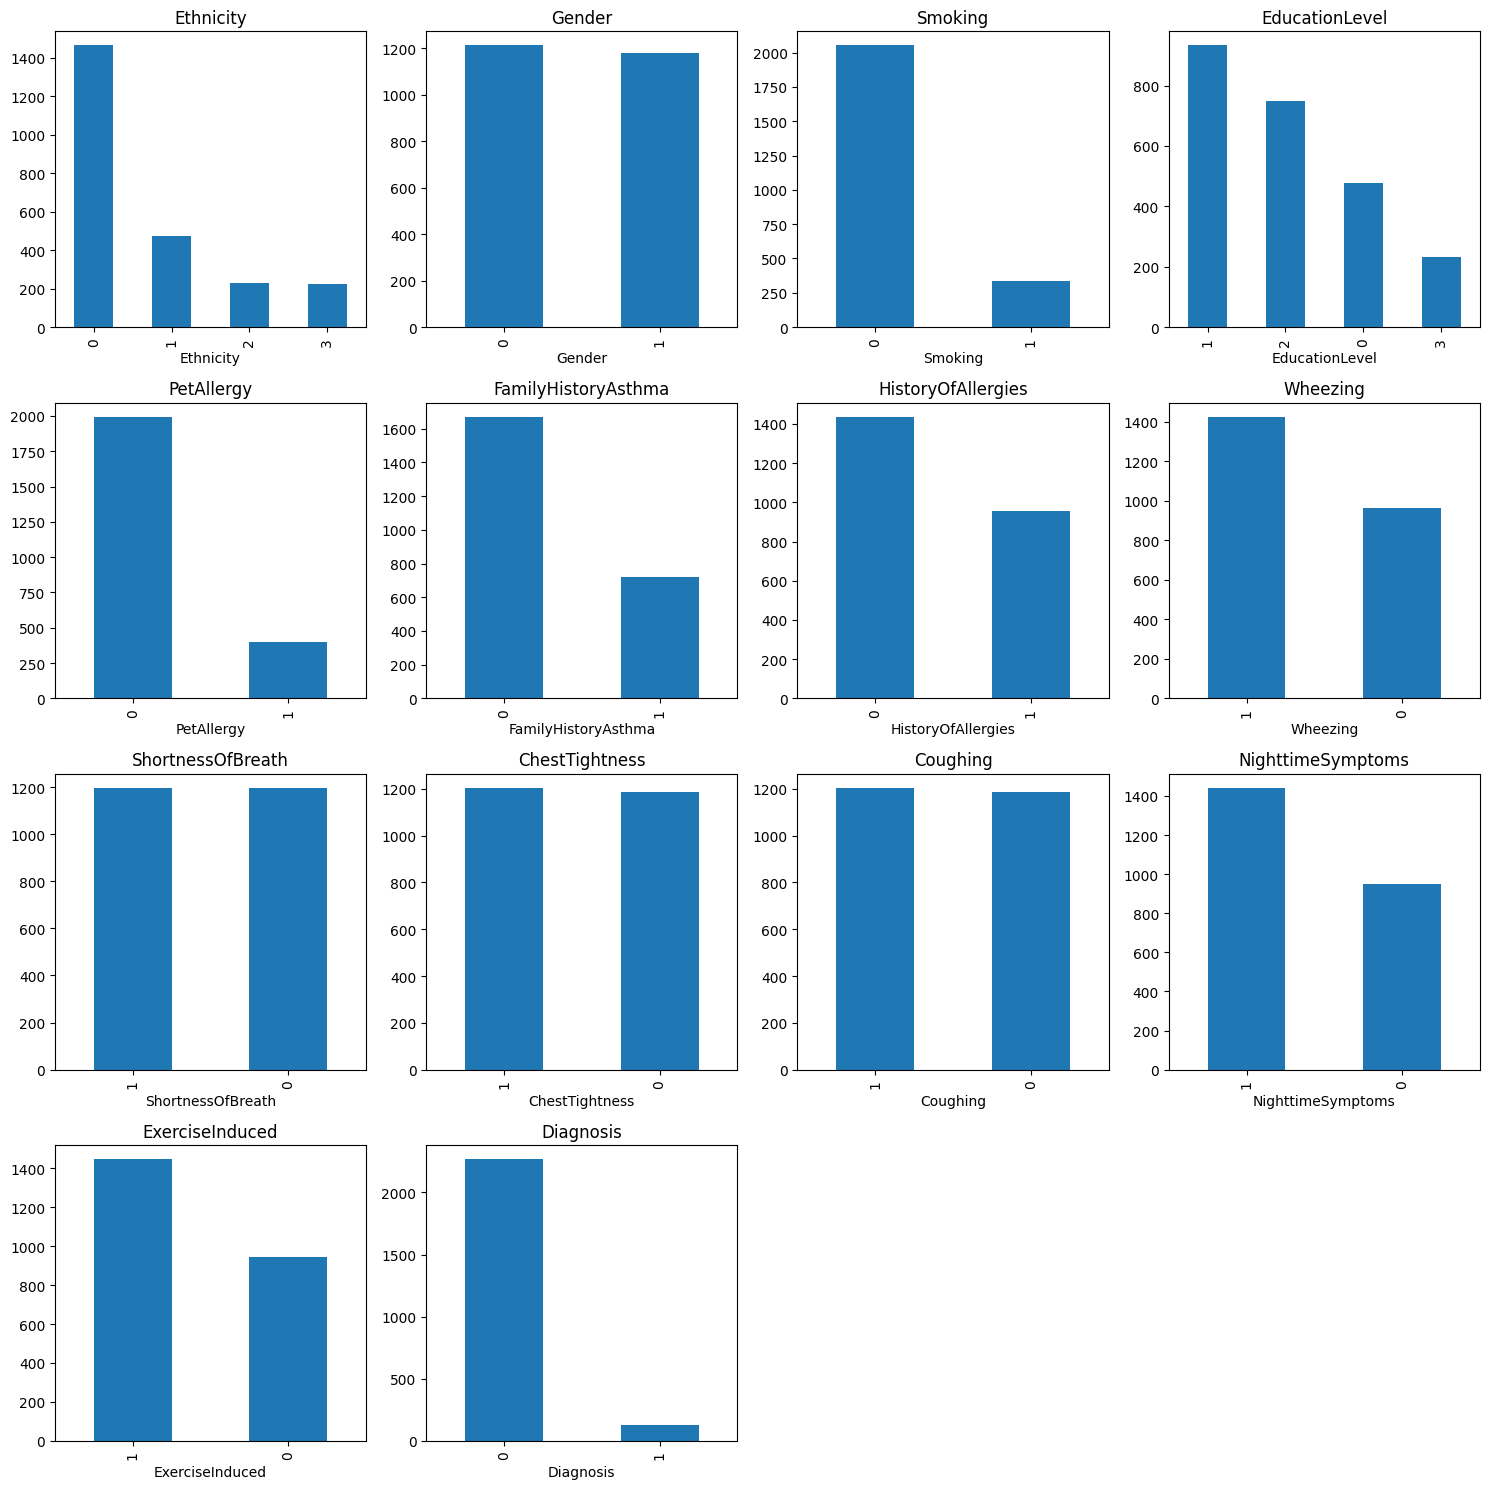

22

In [ ]:
# Histogram for Age, Ethnicity, EducationLevel, BMI, PhysicalActivity, DietQuality, and SleepQuality
hist_cols = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality',
             'SleepQuality','PollenExposure', 'DustExposure', 'PollutionExposure']
data[hist_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Bar plots for the rest of the variables
bar_cols = ['Ethnicity','Gender', 'Smoking','EducationLevel',
            'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Wheezing',
            'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms',
            'ExerciseInduced', 'Diagnosis']

ncols = 4
nrows = 4

# Create the figure and axes
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 15), layout="constrained")

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through the bar_cols and plot on each subplot
for i, col in enumerate(bar_cols):
    data[col].value_counts().plot(kind='bar', ax=axs[i], title=col)

# Remove any unused subplots (if num plots < nrows * ncols)
for i in range(len(bar_cols), nrows * ncols):
    fig.delaxes(axs[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

len(hist_cols) + len(bar_cols)

#Generating Data

In [ ]:
dataX = data.drop('Diagnosis', axis=1)
dataY = data['Diagnosis']
dataX.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0.974339,1,1,0,0,0,1,0,0,1
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,6.584631,0,0,1,1,0,0,1,1,1
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,5.445799,0,1,1,1,1,1,0,1,1
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,3.965316,0,0,0,1,0,1,1,1,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,8.260605,0,0,0,1,1,1,0,0,1


In [ ]:
dataY.shape,dataX.shape

((2392,), (2392, 21))

In [ ]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=42,stratify=dataY)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1913, 21)
X_test shape: (479, 21)
y_train shape: (1913,)
y_test shape: (479,)



#Training model
(no correr de nuevo)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Input((21,)),
    layers.Dense(30, activation='relu',),  # Input layer with 21 neurons
    layers.Dense(50, activation='relu',),  # Input layer with 21 neurons
    layers.Dropout(0.2),
    layers.Dense(100, activation='relu',),  # Input layer with 21 neurons
    layers.Dense(200, activation='relu',kernel_regularizer=keras.regularizers.l2(0.02)),  # Input layer with 21 neurons
    layers.Dropout(0.4),
    layers.Dense(300, activation='relu',),  # Input layer with 21 neurons
    layers.Dense(200, activation='relu',),  # Input layer with 21 neurons
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu',),  # Input layer with 21 neurons
    layers.Dense(20, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),  # Input layer with 21 neurons
    layers.Dense(8, activation='relu',),  # Input layer with 21 neurons
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron (sigmoid for binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000)  # You can adjust the number of epochs

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy,'Test loss:',loss)

Epoch 1/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9317 - loss: 2.7236
Epoch 2/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9430 - loss: 1.2166
Epoch 3/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9513 - loss: 0.6698
Epoch 4/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9512 - loss: 0.4414
Epoch 5/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9467 - loss: 0.3570
Epoch 6/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9456 - loss: 0.3264
Epoch 7/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9473 - loss: 0.2841
Epoch 8/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9498 - loss: 0.2605
Epoch 9/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9498 - loss: 0.2503
Epoch 10/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9563 - loss: 0.2124
Epoch 11/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9528 - loss: 0.2134
Epoch 12/1000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

#Pre-trained model

In [ ]:
# prompt: load keras nn model named model1000.h5

from tensorflow import keras

# Load the pre-trained model
model = keras.models.load_model('/content/model1000.h5')

# Now you can use the loaded model for predictions or further training
# For example:
# predictions = model.predict(new_data)

#Predictions

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Confusion Matrix:


Text(0.5, 1.0, 'Confusion matrix of NN with train data')

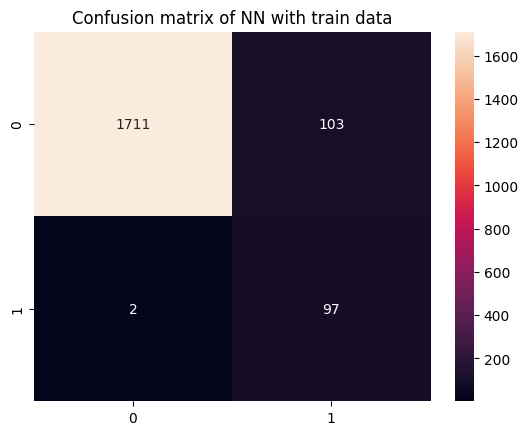

In [ ]:
import seaborn as sns
# Make predictions on the train data
y_pred1 = model.predict(X_train)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_classes1 = (y_pred1 >= 0.2).astype(int)

# Create the confusion matrix
cm1 = confusion_matrix(y_train, y_pred_classes1)

print("Confusion Matrix:")
cm1

sns.heatmap(cm1, annot=True, fmt='d').set_title('Confusion matrix of NN with train data')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Confusion Matrix:


Text(0.5, 1.0, 'Confusion matrix of NN with test data')

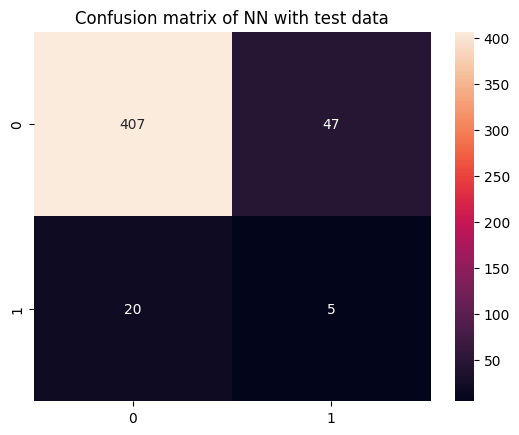

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_classes = (y_pred >= 0.2).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

print("Confusion Matrix:")
cm

sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of NN with test data')


In [ ]:
min(y_pred)

array([0.], dtype=float32)

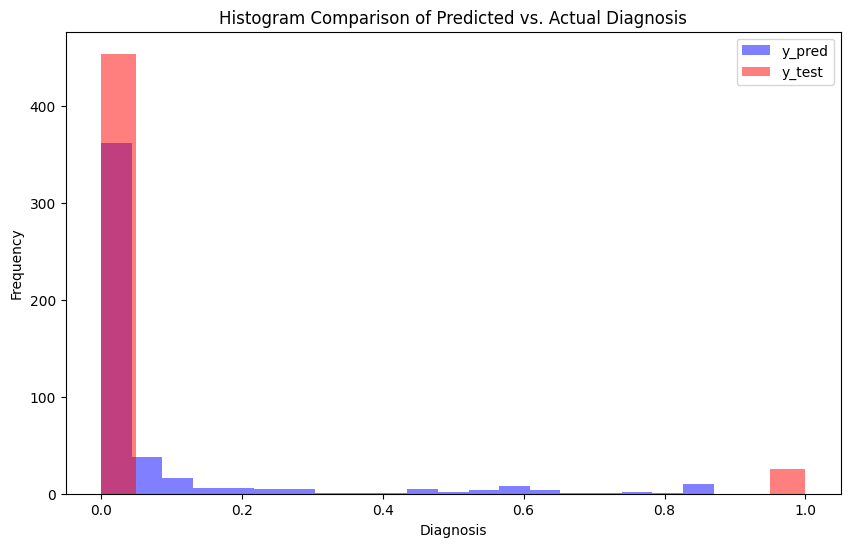

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=20, alpha=0.5, label='y_pred', color='blue')
plt.hist(y_test, bins=20, alpha=0.5, label='y_test', color='red')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Histogram Comparison of Predicted vs. Actual Diagnosis')
plt.legend(loc='upper right')
plt.show()

#SVM Model


In [ ]:

# Create an SVM model
svm_model = svm.SVC(kernel='linear', C=1)  # You can experiment with different kernels and C values

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# You can also print a classification report for more detailed evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9478079331941545
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       454
           1       0.00      0.00      0.00        25

    accuracy                           0.95       479
   macro avg       0.47      0.50      0.49       479
weighted avg       0.90      0.95      0.92       479



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix (SVM):
[[454   0]
 [ 25   0]]


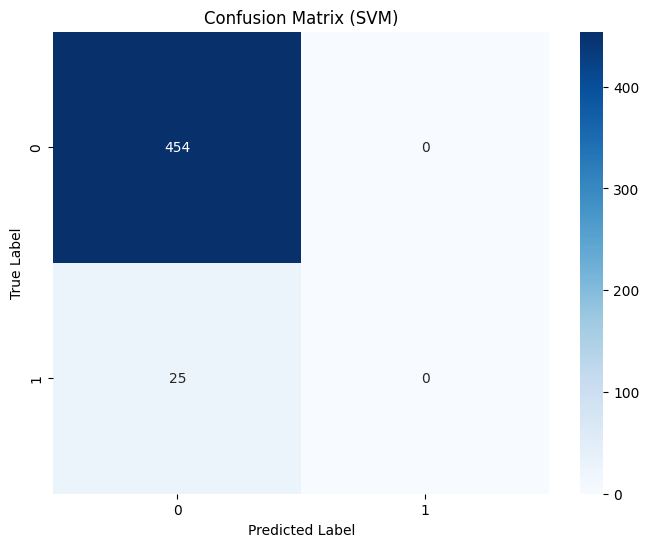

In [ ]:

# Create the confusion matrix for the SVM model
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("Confusion Matrix (SVM):")
print(cm_svm)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion Matrix (SVM - Training Data):
[[1814    0]
 [  99    0]]


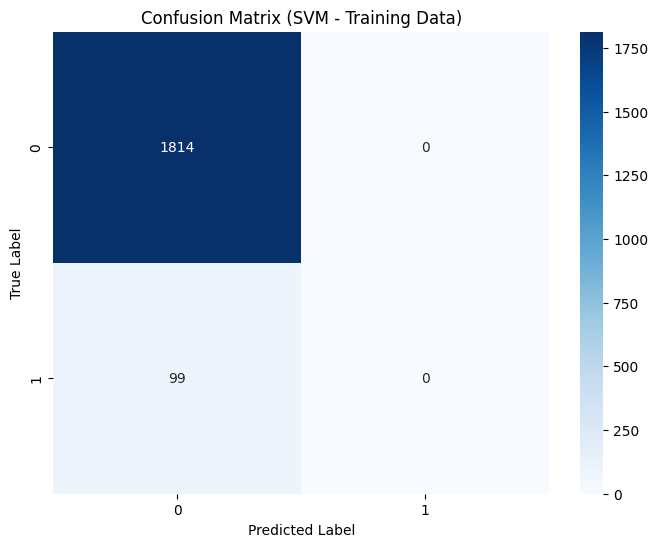

In [ ]:
# Make predictions on the training data using the SVM model
y_pred_svm_train = svm_model.predict(X_train)

# Create the confusion matrix for the SVM model with training data
cm_svm_train = confusion_matrix(y_train, y_pred_svm_train)

print("Confusion Matrix (SVM - Training Data):")
print(cm_svm_train)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (SVM - Training Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# Cross-validation for SVM
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Define the cross-validation strategy
svm_scores = cross_val_score(svm_model, dataX, dataY, cv=kf, scoring='accuracy')

In [ ]:
print("SVM Cross-validation scores:", svm_scores)
print("SVM Mean accuracy:", svm_scores.mean())

SVM Cross-validation scores: [0.9519833  0.94572025 0.95606695 0.95606695 0.93096234]
SVM Mean accuracy: 0.9481599566740332


In [ ]:
!pip install scikeras

In [ ]:
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier # Import KerasClassifier
model1 = keras.Sequential([
    layers.Input((21,)),
    layers.Dense(30, activation='relu',),  # Input layer with 21 neurons
    layers.Dense(50, activation='relu',),  # Input layer with 21 neurons
    layers.Dropout(0.2),
    layers.Dense(100, activation='relu',),  # Input layer with 21 neurons
    layers.Dense(200, activation='relu',kernel_regularizer=keras.regularizers.l2(0.02)),  # Input layer with 21 neurons
    layers.Dropout(0.4),
    layers.Dense(300, activation='relu',),  # Input layer with 21 neurons
    layers.Dense(200, activation='relu',),  # Input layer with 21 neurons
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu',),  # Input layer with 21 neurons
    layers.Dense(20, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),  # Input layer with 21 neurons
    layers.Dense(8, activation='relu',),  # Input layer with 21 neurons
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron (sigmoid for binary classification)
])

# Compile the model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model = KerasClassifier(model=model1, epochs=100, verbose=0)
# Cross-validation for Neural Network
nn_scores = cross_val_score(model, dataX, dataY, cv=kf, scoring='accuracy')
print("Neural Network Cross-validation scores:", nn_scores)
print("Neural Network Mean accuracy:", nn_scores.mean())

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 42 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 42 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 42 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 42 variables whereas the saved o

Neural Network Cross-validation scores: [0.9519833  0.94572025 0.93096234 0.95606695 0.93096234]
Neural Network Mean accuracy: 0.9431390361719412


In [ ]:
print("Neural Network Cross-validation scores:", nn_scores)
print("Neural Network Mean accuracy:", nn_scores.mean())


Neural Network Cross-validation scores: [0.9519833  0.94572025 0.93096234 0.95606695 0.93096234]
Neural Network Mean accuracy: 0.9431390361719412


El svm es ligeramente mejor pero computacionalmente más costoso

#Aprendizaje no supervisado: Clustering
#K - Means vs K - Prototypes

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_data = df[hist_cols]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical data
scaled_data = scaler.fit_transform(numerical_data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=hist_cols)

scaled_df.head()

,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollenExposure,DustExposure,PollutionExposure
0,0.783784,0.032738,0.089324,0.548738,0.783941,0.285523,0.097217,0.738898
1,0.283784,0.309582,0.589909,0.633997,0.192255,0.745783,0.658399,0.196922
2,0.702703,0.134793,0.674163,0.919608,0.473612,0.144769,0.544485,0.145987
3,0.472973,0.941078,0.140359,0.582532,0.041970,0.757202,0.396396,0.058100
4,0.756757,0.170395,0.460548,0.312499,0.938207,0.304948,0.826042,0.098005


In [ ]:
!pip install kneed

Elbow method suggests k = 4


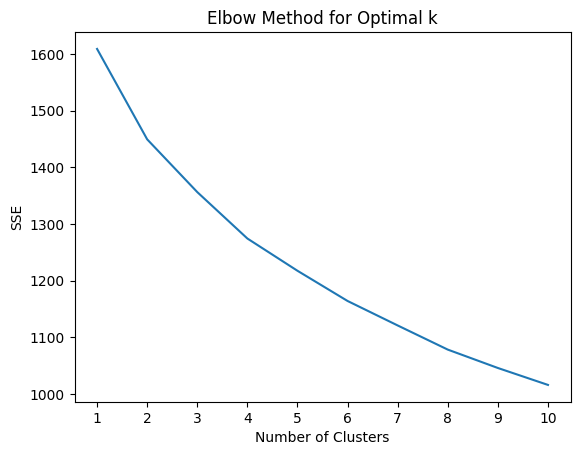

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(f"Elbow method suggests k = {kl.elbow}")

# Plot the elbow curve
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_df)

# Get cluster labels for each data point
labels = kmeans.labels_

# Add cluster labels to your dataframe
scaled_df['cluster'] = labels

scaled_df.head()

,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollenExposure,DustExposure,PollutionExposure,cluster
0,0.783784,0.032738,0.089324,0.548738,0.783941,0.285523,0.097217,0.738898,3
1,0.283784,0.309582,0.589909,0.633997,0.192255,0.745783,0.658399,0.196922,1
2,0.702703,0.134793,0.674163,0.919608,0.473612,0.144769,0.544485,0.145987,2
3,0.472973,0.941078,0.140359,0.582532,0.041970,0.757202,0.396396,0.058100,1
4,0.756757,0.170395,0.460548,0.312499,0.938207,0.304948,0.826042,0.098005,2


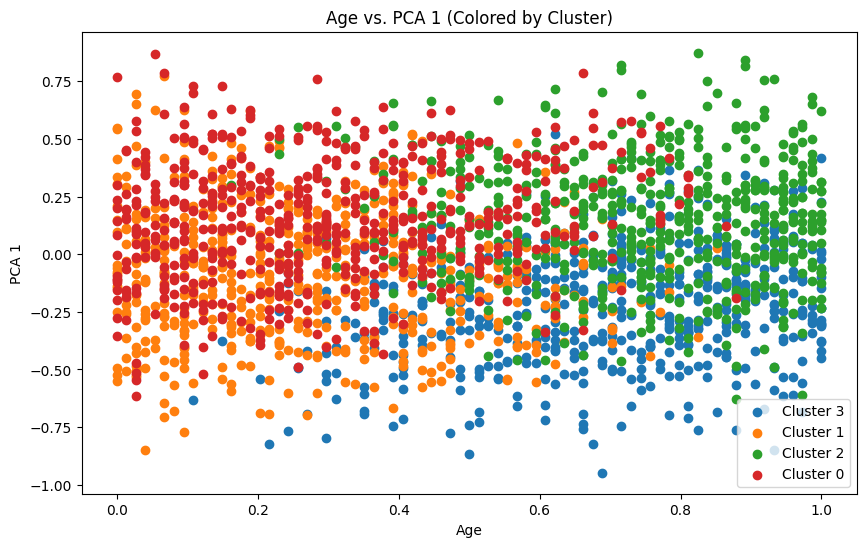

In [ ]:
from sklearn.decomposition import PCA

# Select the features for PCA
features = ['BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
            'PollenExposure', 'DustExposure', 'PollutionExposure']
X = scaled_df[features]

# Apply PCA with 1 component
pca = PCA(n_components=1)
pca_result = pca.fit_transform(X)

# Create a new DataFrame with PCA result and age
pca_df = pd.DataFrame({'PCA_1': pca_result.flatten(), 'Age': scaled_df['Age'], 'cluster': scaled_df['cluster']})

# Plot age vs. the first principal component, colored by cluster
plt.figure(figsize=(10, 6))
for cluster in pca_df['cluster'].unique():
    subset = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(subset['Age'], subset['PCA_1'], label=f'Cluster {cluster}')

plt.xlabel('Age')
plt.ylabel('PCA 1')
plt.title('Age vs. PCA 1 (Colored by Cluster)')
plt.legend()
plt.show()

#Compare to real labels when k=2

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(scaled_df)

# Get cluster labels for each data point
labels = kmeans2.labels_

# Add cluster labels to your dataframe
scaled_df['cluster'] = labels

scaled_df.head()

,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollenExposure,DustExposure,PollutionExposure,cluster
0,0.783784,0.032738,0.089324,0.548738,0.783941,0.285523,0.097217,0.738898,1
1,0.283784,0.309582,0.589909,0.633997,0.192255,0.745783,0.658399,0.196922,0
2,0.702703,0.134793,0.674163,0.919608,0.473612,0.144769,0.544485,0.145987,1
3,0.472973,0.941078,0.140359,0.582532,0.041970,0.757202,0.396396,0.058100,0
4,0.756757,0.170395,0.460548,0.312499,0.938207,0.304948,0.826042,0.098005,1


In [ ]:
comparison_df = pd.DataFrame({'Diagnosis': df['Diagnosis'], 'Cluster': scaled_df['cluster']})
print(comparison_df)

# Further analysis: Contingency table
contingency_table = pd.crosstab(comparison_df['Diagnosis'], comparison_df['Cluster'])
print("\nContingency Table:")
print(contingency_table)

# Calculate and print the accuracy
correct_predictions = np.sum(comparison_df['Diagnosis'] == comparison_df['Cluster'])
total_predictions = len(comparison_df)
accuracy = correct_predictions / total_predictions
print("\nAccuracy:", accuracy)

      Diagnosis  Cluster
0             0        1
1             0        0
2             0        1
3             0        0
4             0        1
...         ...      ...
2387          1        1
2388          1        0
2389          1        1
2390          0        0
2391          0        0

[2392 rows x 2 columns]

Contingency Table:
Cluster       0     1
Diagnosis            
0          1137  1131
1            66    58

Accuracy: 0.4995819397993311


In [ ]:
from sklearn.metrics import recall_score, f1_score

recall = recall_score(comparison_df['Diagnosis'], comparison_df['Cluster'])
print("\nRecall:", recall)

# Calculate F1-score
f1 = f1_score(comparison_df['Diagnosis'], comparison_df['Cluster'])
print("\nF1-score:", f1)


Recall: 0.46774193548387094

F1-score: 0.08834729626808835


##K - Prototypes

In [ ]:
!pip install kmodes
!pip install gower

In [ ]:
data.drop(['Diagnosis','Age'], axis=1, inplace=True)
data.head()

,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced
0,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,1,0,0,1
1,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,1,0,0,1,1,1
2,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,1,1,1,0,1,1
3,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,1,0,1,1,1,0
4,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,1,1,1,0,0,1


In [ ]:
bar_cols[:-1]

['Ethnicity',
 'Gender',
 'Smoking',
 'EducationLevel',
 'PetAllergy',
 'FamilyHistoryAsthma',
 'HistoryOfAllergies',
 'Wheezing',
 'ShortnessOfBreath',
 'ChestTightness',
 'Coughing',
 'NighttimeSymptoms',
 'ExerciseInduced']

In [ ]:
bar_cols_indices = [data.columns.get_loc(col) for col in bar_cols[:-1] if col in data.columns]
bar_cols_indices

[1, 0, 4, 2, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
len(bar_cols_indices)+7

20

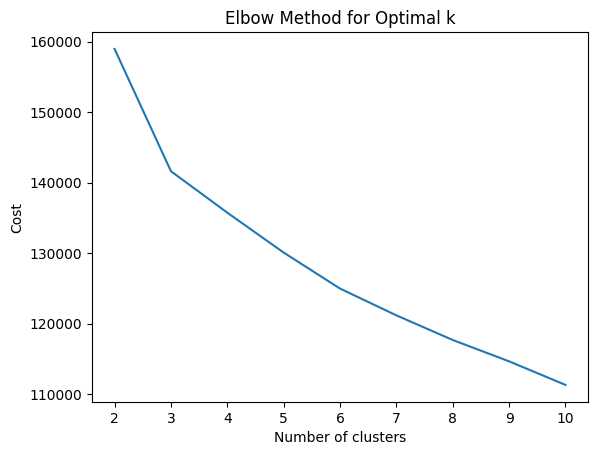

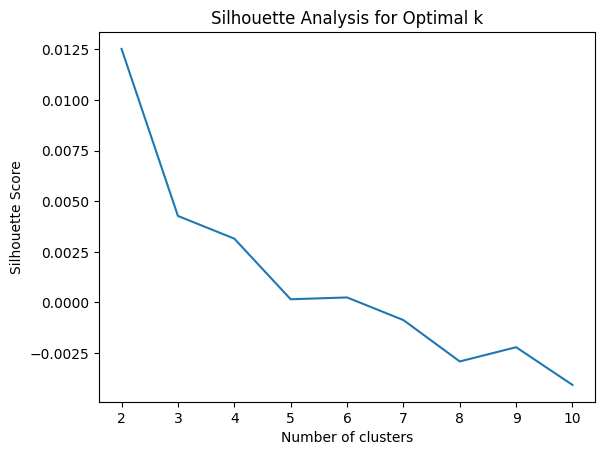

Optimal k using silhouette: 2


In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import gower

# Calculate Gower distance matrix
dist_matrix = gower.gower_matrix(data)

# K-Prototypes with Elbow method and Silhouette analysis
cost = []
silhouette_avg = []
for num_clusters in range(2, 11):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', verbose=0)
    kproto.fit_predict(data, categorical=bar_cols_indices)
    cost.append(kproto.cost_)
    cluster_labels = kproto.labels_
    silhouette_avg.append(silhouette_score(dist_matrix, cluster_labels))

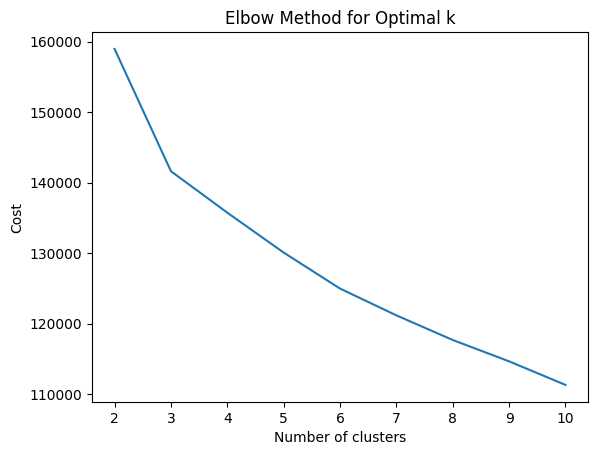

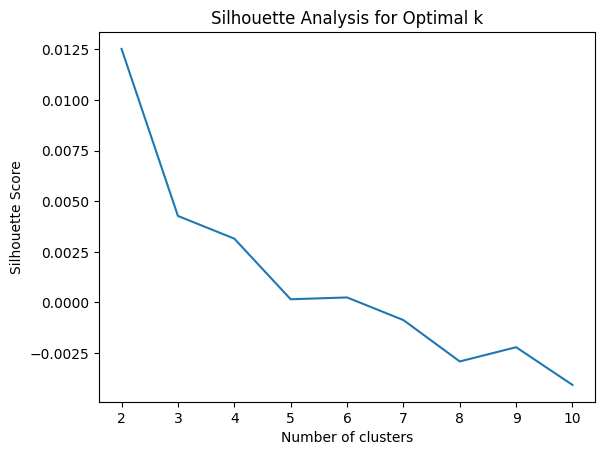

Optimal k using silhouette: 2


In [ ]:
# Plot the elbow method
plt.plot(range(2, 11), cost)
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
plt.title("Elbow Method for Optimal k")
plt.show()


# Plot the silhouette analysis
plt.plot(range(2, 11), silhouette_avg)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal k")
plt.show()

kl = KneeLocator(range(2, 11), silhouette_avg, curve="concave", direction="increasing")
optimal_k = kl.elbow
print(f"Optimal k using silhouette: {optimal_k}")

In [ ]:
kproto1 = KPrototypes(n_clusters=2, init='Cao', verbose=0)
kproto1.fit_predict(data, categorical=bar_cols_indices)

cluster_labels = kproto1.labels_
data['cluster'] = cluster_labels

In [ ]:
data['Age'] = df.copy()['Age']
data.head()

,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,...,FamilyHistoryAsthma,HistoryOfAllergies,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,cluster,Age
0,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,...,1,0,0,0,1,0,0,1,1,63
1,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,...,0,1,1,0,0,1,1,1,0,26
2,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,...,1,1,1,1,1,0,1,1,1,57
3,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,...,0,0,1,0,1,1,1,0,0,40
4,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,...,0,0,1,1,1,0,0,1,1,61


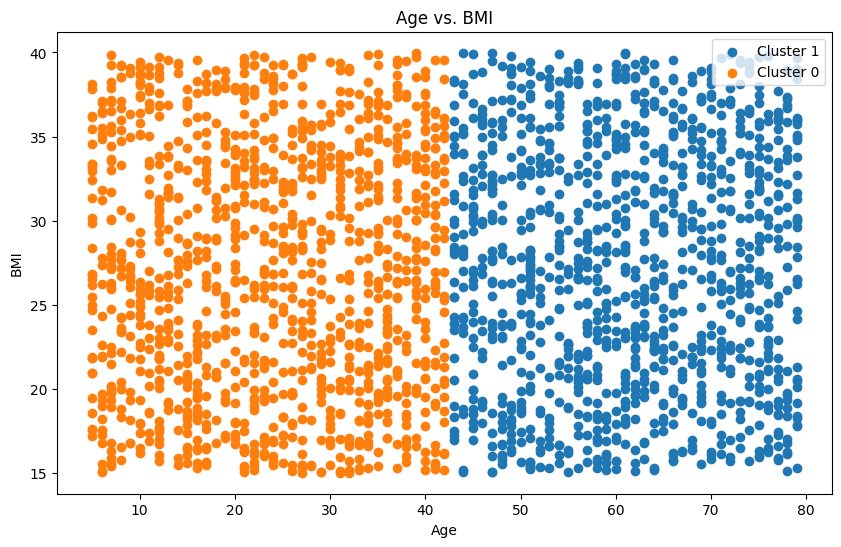

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in data['cluster'].unique():
    subset = data[data['cluster'] == cluster]
    plt.scatter(subset['Age'], subset['BMI'], label=f'Cluster {cluster}')

plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs. BMI')
plt.legend()
plt.show()

In [ ]:
df2 = data.copy()
df2.drop('cluster', axis=1, inplace=True)

covariance_matrix = df2.cov()

# Set a correlation threshold (e.g., 0.8)
threshold = 0.8

# Find highly correlated variables
highly_correlated_variables = []
for i in range(len(covariance_matrix.columns)):
    for j in range(i + 1, len(covariance_matrix.columns)):
        if abs(covariance_matrix.iloc[i, j]) > threshold:
            highly_correlated_variables.append((covariance_matrix.columns[i],
                                                covariance_matrix.columns[j],
                                                covariance_matrix.iloc[i, j]))

# Print the highly correlated variable pairs and their covariance
print("Highly Correlated Variable Pairs:")
for var1, var2, covariance in highly_correlated_variables:
    print(f"{var1} and {var2}: Covariance = {covariance}")

Highly Correlated Variable Pairs:
BMI and DustExposure: Covariance = 1.3351224762671838
BMI and Age: Covariance = 2.5182047518516395
PollutionExposure and Age: Covariance = -2.683713558771351
DustExposure and Age: Covariance = 0.8554872985901283


In [ ]:
df2.head()

,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,...,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Age
0,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,...,1,1,0,0,0,1,0,0,1,63
1,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,...,0,0,1,1,0,0,1,1,1,26
2,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,...,0,1,1,1,1,1,0,1,1,57
3,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,...,0,0,0,1,0,1,1,1,0,40
4,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,...,0,0,0,1,1,1,0,0,1,61


In [ ]:
from sklearn.preprocessing import StandardScaler

pca_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'PhysicalActivity',
            'DietQuality', 'SleepQuality', 'PollenExposure', 'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies',
            'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
            'NighttimeSymptoms', 'ExerciseInduced']


pca_data = data[pca_cols].copy()


categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'PetAllergy',
                   'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Wheezing',
                   'ShortnessOfBreath', 'ChestTightness', 'Coughing',
                   'NighttimeSymptoms', 'ExerciseInduced']

pca_data = pd.get_dummies(pca_data, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
scaled_pca_data = scaler.fit_transform(pca_data)

pca = PCA(n_components=1) # Change n_components as needed
pca_index = pca.fit_transform(scaled_pca_data)

# Add the PCA index to the original DataFrame
data['PCA_Index'] = pca_index

# Print the DataFrame with the PCA index
data[['Age', 'PCA_Index']]

,Age,PCA_Index
0,63,-0.119891
1,26,-1.572429
2,57,1.285219
3,40,1.226504
4,61,-0.200483
...,...,...
2387,43,-1.650841
2388,18,1.478054
2389,54,-1.458928
2390,46,-1.609384


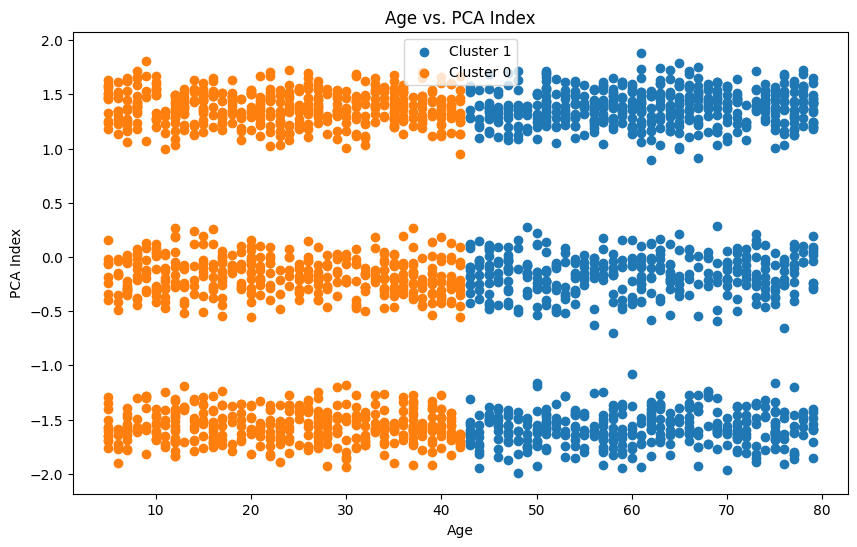

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in data['cluster'].unique():
    subset = data[data['cluster'] == cluster]
    plt.scatter(subset['Age'], subset['PCA_Index'], label=f'Cluster {cluster}')

plt.xlabel('Age')
plt.ylabel('PCA Index')
plt.title('Age vs. PCA Index')
plt.legend()
plt.show()